# 1. Data Importing 

In [4]:
import pandas as pd

data = pd.read_csv("D:/#DataAnalyst/Primetrade.ai assignment/TRADES_CopyTr_90D_ROI.csv")
data

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
...,...,...
145,4000222729738650369,"[{'time': 1718982068000, 'symbol': 'ARKMUSDT',..."
146,3998659472131949824,"[{'time': 1718979385000, 'symbol': 'BTCUSDT', ..."
147,4028701921959171840,"[{'time': 1718984241000, 'symbol': 'BTCUSDT', ..."
148,4014818740371615232,"[{'time': 1718983357000, 'symbol': 'SOLUSDT', ..."


In [5]:
data.head()

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Port_IDs       150 non-null    int64 
 1   Trade_History  149 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [8]:
data.describe()

,Port_IDs
count,1.500000e+02
mean,3.975655e+18
std,6.887470e+16
min,3.672755e+18
25%,3.943672e+18
50%,3.998616e+18
75%,4.029508e+18
max,4.041860e+18


In [9]:
data.isnull().sum()

Port_IDs         0
Trade_History    1
dtype: int64

In [14]:
print(data["Trade_History"].duplicated()) #rowwise duplicated data

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Trade_History, Length: 150, dtype: bool


# 2. Data Cleaning and Arrangement

## 2.1 Converting JSON-Like values into Row-Column Format

In [15]:
import pandas as pd
import ast  # For safely parsing string literals

# Load the dataset
file_path = "D:/#DataAnalyst/Primetrade.ai assignment/TRADES_CopyTr_90D_ROI.csv"
data = pd.read_csv(file_path)

# Handle missing values in 'Trade_History'
data['Trade_History'] = data['Trade_History'].fillna('[]')

# Convert the JSON-like strings in 'Trade_History' to Python dictionaries
data['Trade_History'] = data['Trade_History'].apply(ast.literal_eval)

# Expand the dictionaries into separate rows and extract columns
expanded_data = data.explode('Trade_History')
expanded_data = pd.concat(
    [expanded_data.drop(columns=['Trade_History']), 
     expanded_data['Trade_History'].apply(pd.Series)], 
    axis=1
)

# Save the expanded dataset to a new CSV (optional)
expanded_data.to_csv("expanded_trade_history.csv", index=False)

# Display the first few rows of the transformed dataset
expanded_data.head()


,Port_IDs,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,0
0,3925368433214965504,1.718900e+12,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True,NaN
0,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False,NaN
0,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False,NaN
0,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True,NaN
0,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True,NaN


In [20]:
expanded_data.isnull().sum() #checking the null values available in the data.

Port_IDs                    0
time                        1
symbol                      1
side                        1
price                       1
fee                         1
feeAsset                    1
quantity                    1
quantityAsset               1
realizedProfit              1
realizedProfitAsset         1
baseAsset                   1
qty                         1
positionSide                1
activeBuy                   1
0                      211278
dtype: int64

In [19]:
# Save the expanded dataset to a new CSV file
output_path = "D:/#DataAnalyst/Primetrade.ai assignment/expanded_trade_history.csv"
expanded_data.to_csv(output_path, index=False)

print(f"File successfully saved at: {output_path}")


File successfully saved at: D:/#DataAnalyst/Primetrade.ai assignment/expanded_trade_history.csv


In [21]:
expanded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211278 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Port_IDs             211278 non-null  int64  
 1   time                 211277 non-null  float64
 2   symbol               211277 non-null  object 
 3   side                 211277 non-null  object 
 4   price                211277 non-null  float64
 5   fee                  211277 non-null  float64
 6   feeAsset             211277 non-null  object 
 7   quantity             211277 non-null  float64
 8   quantityAsset        211277 non-null  object 
 9   realizedProfit       211277 non-null  float64
 10  realizedProfitAsset  211277 non-null  object 
 11  baseAsset            211277 non-null  object 
 12  qty                  211277 non-null  float64
 13  positionSide         211277 non-null  object 
 14  activeBuy            211277 non-null  object 
 15  0                    0 no

In [25]:
import pandas as pd

# Load the dataset
input_path = "D:/#DataAnalyst/Primetrade.ai assignment/expanded_trade_history.csv"
data = pd.read_csv(input_path)

# Remove the row where 'Port_IDs' has the value 3919965573764932864
data = data[data['Port_IDs'] != 3919965573764932864]

# Remove the empty column with header '0' if it exists
if '0' in data.columns:
    data = data.drop(columns=['0'])

# Save the cleaned dataset
output_path = "D:/#DataAnalyst/Primetrade.ai assignment/cleaned_trade_history_filtered.csv"
data.to_csv(output_path, index=False)

print(f"File successfully saved at: {output_path}")


C:\Users\SHRIGANESH KULKARNI\AppData\Local\Temp\ipykernel_13648\1914809009.py:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_path)


File successfully saved at: D:/#DataAnalyst/Primetrade.ai assignment/cleaned_trade_history_filtered.csv


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211277 entries, 0 to 211277
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Port_IDs             211277 non-null  int64  
 1   time                 211277 non-null  float64
 2   symbol               211277 non-null  object 
 3   side                 211277 non-null  object 
 4   price                211277 non-null  float64
 5   fee                  211277 non-null  float64
 6   feeAsset             211277 non-null  object 
 7   quantity             211277 non-null  float64
 8   quantityAsset        211277 non-null  object 
 9   realizedProfit       211277 non-null  float64
 10  realizedProfitAsset  211277 non-null  object 
 11  baseAsset            211277 non-null  object 
 12  qty                  211277 non-null  float64
 13  positionSide         211277 non-null  object 
 14  activeBuy            211277 non-null  object 
dtypes: float64(6), int64(1

In [27]:
data.isnull().sum()

Port_IDs               0
time                   0
symbol                 0
side                   0
price                  0
fee                    0
feeAsset               0
quantity               0
quantityAsset          0
realizedProfit         0
realizedProfitAsset    0
baseAsset              0
qty                    0
positionSide           0
activeBuy              0
dtype: int64

In [28]:
data

,Port_IDs,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,3925368433214965504,1.718900e+12,SOLUSDT,BUY,132.537000,-0.994027,USDT,1988.055000,USDT,0.0,USDT,SOL,15.0,LONG,True
1,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.279796,USDT,1398.980880,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.039494,USDT,197.470220,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.008284,USDT,16.567520,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.046109,USDT,92.217740,USDT,0.0,USDT,DOGE,757.0,LONG,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211273,3768170840939476993,1.718550e+12,JASMYUSDT,SELL,0.035968,-0.025070,USDT,50.139392,USDT,0.0,USDT,JASMY,1394.0,BOTH,False
211274,3768170840939476993,1.718550e+12,JASMYUSDT,SELL,0.035968,-0.008255,USDT,16.509312,USDT,0.0,USDT,JASMY,459.0,BOTH,False
211275,3768170840939476993,1.718550e+12,JASMYUSDT,SELL,0.035969,-0.031545,USDT,63.089626,USDT,0.0,USDT,JASMY,1754.0,BOTH,False
211276,3768170840939476993,1.718550e+12,JASMYUSDT,SELL,0.035969,-0.031905,USDT,63.809006,USDT,0.0,USDT,JASMY,1774.0,BOTH,False


## 2.1 Renaming columns as per requirement

In [36]:
import pandas as pd

# Load your dataset
file_path = r"D:/#DataAnalyst/Primetrade.ai assignment/cleaned_trade_history_filtered.csv"
data = pd.read_csv(file_path)

# 1. Make all column headers title case (first letter of each word in uppercase)
data.columns = data.columns.str.title()

# 2. Convert 'Time' (now 'Trade Execution Time' after renaming) into human-readable datetime format
# Check if the time is in milliseconds, divide by 1000 if needed
data['Time'] = pd.to_datetime(data['Time'], unit='ms')

# 3. Rename specified columns
data.rename(columns={
    'Port_Ids' : 'Port ID',
    'Price': 'Unit Price',
    'Quantity': 'Total Quantity Traded (USDT)',
    'Time': 'Trade Execution Time',
    'Fee': 'Platform Fee (USDT)',
    'Qty': 'Quantity Traded In Base Asset',
    'Realizedprofit': 'Realized Profit (USDT)',
    'Positionside': 'Position Side',
    'Activebuy': 'Active Buy' 
}, inplace=True)

# Remove the specified columns
columns_to_remove = ['Feeasset', 'Quantityasset', 'Realizedprofitasset']
data.drop(columns=columns_to_remove, inplace=True)

# Save the updated dataset
output_path = r"D:/#DataAnalyst/Primetrade.ai assignment/updated_trade_history.csv"
data.to_csv(output_path, index=False)

print("Dataset updated successfully and saved at:", output_path)


Dataset updated successfully and saved at: D:/#DataAnalyst/Primetrade.ai assignment/updated_trade_history.csv


In [32]:
data.head()

,Port_Ids,Trade Execution Time,Symbol,Side,Unit Price,Platform Fee,Feeasset,Total Quantity Traded,Quantityasset,Realizedprofit,Realizedprofitasset,Baseasset,Quantity Traded Of Base Asset,Positionside,Activebuy
0,3925368433214965504,2024-06-20 16:07:36,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True
1,3925368433214965504,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,3925368433214965504,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,3925368433214965504,2024-06-20 16:06:56,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,3925368433214965504,2024-06-20 16:06:56,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True


# 3. Data Analysis - Metrics Calculation



In [37]:
import pandas as pd
import numpy as np

# Load dataset
file_path = r'D:/#DataAnalyst/Primetrade.ai assignment/updated_trade_history.csv'
data = pd.read_csv(file_path)

# a. Total Positions
total_positions = data.groupby('Port ID').size().reset_index(name='Total Positions')

# b. Win Positions
data['Winning Trade'] = data['Realized Profit (USDT)'] > 0
win_positions = data.groupby('Port ID')['Winning Trade'].sum().reset_index(name='Win Positions')

# c. Win Rate
win_rate = pd.merge(total_positions, win_positions, on='Port ID')
win_rate['Win Rate (%)'] = (win_rate['Win Positions'] / win_rate['Total Positions']) * 100

# d. PnL (Profit and Loss)
pnl = data.groupby('Port ID')['Realized Profit (USDT)'].sum().reset_index(name='PnL')

# e. ROI (Return on Investment)
total_quantity_traded = data.groupby('Port ID')['Total Quantity Traded (USDT)'].sum().reset_index(name='Total Quantity Traded (USDT)')
roi = pd.merge(pnl, total_quantity_traded, on='Port ID')
roi['ROI (%)'] = (roi['PnL'] / roi['Total Quantity Traded (USDT)']) * 100

# f. Sharpe Ratio
profit_stats = data.groupby('Port ID')['Realized Profit (USDT)'].agg(['mean', 'std']).reset_index()
profit_stats['Sharpe Ratio'] = profit_stats['mean'] / profit_stats['std']

# g. Maximum Drawdown (MDD)
data['Cumulative Profit'] = data.groupby('Port ID')['Realized Profit (USDT)'].cumsum()
data['Cumulative Max'] = data.groupby('Port ID')['Cumulative Profit'].cummax()
data['Drawdown'] = data['Cumulative Max'] - data['Cumulative Profit']
mdd = data.groupby('Port ID')['Drawdown'].max().reset_index(name='MDD')

# h. Position Identification
data['Position Classification'] = data['Side'] + '_' + data['Position Side']

# Combine all metrics into a single DataFrame
final_metrics = total_positions.copy()
final_metrics = final_metrics.merge(win_positions, on='Port ID')
final_metrics = final_metrics.merge(win_rate[['Port ID', 'Win Rate (%)']], on='Port ID')
final_metrics = final_metrics.merge(pnl, on='Port ID')
final_metrics = final_metrics.merge(roi[['Port ID', 'ROI (%)']], on='Port ID')
final_metrics = final_metrics.merge(profit_stats[['Port ID', 'Sharpe Ratio']], on='Port ID')
final_metrics = final_metrics.merge(mdd, on='Port ID')

# Save final metrics to CSV
output_path = r'D:/#DataAnalyst/Primetrade.ai assignment/final_metrics.csv'
final_metrics.to_csv(output_path, index=False)

# Display sample output
final_metrics.head()


,Port ID,Total Positions,Win Positions,Win Rate (%),PnL,ROI (%),Sharpe Ratio,MDD
0,3672754654734989568,474,210,44.303797,566.597660,0.476385,0.185274,80.777037
1,3733192481840423936,689,553,80.261248,2923.977200,0.251099,0.060265,2743.120000
2,3768170840939476993,14,6,42.857143,243.668899,8.779089,0.424277,0.000000
3,3784403294629753856,6050,1829,30.231405,2521.814305,0.339819,0.106585,271.291981
4,3786761687746711808,82,37,45.121951,205.021400,0.332072,0.215150,123.460267


In [39]:
final_metrics

,Port ID,Total Positions,Win Positions,Win Rate (%),PnL,ROI (%),Sharpe Ratio,MDD
0,3672754654734989568,474,210,44.303797,566.597660,0.476385,0.185274,80.777037
1,3733192481840423936,689,553,80.261248,2923.977200,0.251099,0.060265,2743.120000
2,3768170840939476993,14,6,42.857143,243.668899,8.779089,0.424277,0.000000
3,3784403294629753856,6050,1829,30.231405,2521.814305,0.339819,0.106585,271.291981
4,3786761687746711808,82,37,45.121951,205.021400,0.332072,0.215150,123.460267
...,...,...,...,...,...,...,...,...
144,4039279455324236544,327,181,55.351682,1038.807419,1.022101,0.471684,0.000000
145,4040382575336130560,76,0,0.000000,0.000000,0.000000,NaN,0.000000
146,4040843843196854529,59,19,32.203390,2151.704060,0.985523,0.341668,0.000000
147,4041804592937345281,368,85,23.097826,-776.343000,-0.134287,-0.077929,1026.620859


# 4. Ranking Algorithm

## 4.1 Ranking Algorithm

In [40]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load final metrics CSV
file_path = r'D:/#DataAnalyst/Primetrade.ai assignment/final_metrics.csv'
final_metrics = pd.read_csv(file_path)

# Define weights for each metric
weights = {
    'ROI (%)': 0.3,         # 30%
    'PnL': 0.25,            # 25%
    'Sharpe Ratio': 0.2,    # 20%
    'Win Rate (%)': 0.15,   # 15%
    'MDD': -0.1             # 10% (negative weight because lower MDD is better)
}

# Normalize the metrics using Min-Max Scaling
scaler = MinMaxScaler()
metrics_to_normalize = ['ROI (%)', 'PnL', 'Sharpe Ratio', 'Win Rate (%)', 'MDD']
normalized_metrics = scaler.fit_transform(final_metrics[metrics_to_normalize])
normalized_df = pd.DataFrame(normalized_metrics, columns=metrics_to_normalize)

# Apply weights to normalized metrics
for metric, weight in weights.items():
    normalized_df[metric] *= weight

# Calculate final score
final_metrics['Final Score'] = normalized_df.sum(axis=1)

# Rank accounts by final score
final_metrics['Rank'] = final_metrics['Final Score'].rank(ascending=False, method='dense')

# Select top 20 accounts
top_20_accounts = final_metrics.sort_values(by='Final Score', ascending=False).head(20)

# Save top 20 accounts to CSV
output_path = r'D:/#DataAnalyst/Primetrade.ai assignment/top_20_accounts.csv'
top_20_accounts.to_csv(output_path, index=False)

# Display sample output
top_20_accounts


,Port ID,Total Positions,Win Positions,Win Rate (%),PnL,ROI (%),Sharpe Ratio,MDD,Final Score,Rank
8,3826087012661391104,108,63,58.333333,532.656974,12.178517,0.675101,12.925980,0.647133,1.0
2,3768170840939476993,14,6,42.857143,243.668899,8.779089,0.424277,0.000000,0.468321,2.0
47,3956048468100538880,28,20,71.428571,1373.564890,1.114561,0.524862,0.000000,0.365830,3.0
62,3986814617275053313,3554,2780,78.221722,16337.461881,0.871628,0.329787,2.381947,0.365163,4.0
143,4039129759104249600,133,59,44.360902,1264.289200,3.162479,0.522043,0.000000,0.363856,5.0
75,3999240873283311617,4522,2366,52.321981,42574.473679,0.543673,0.227505,300.813848,0.358005,6.0
16,3891020560590657281,437,283,64.759725,2856.300564,1.743407,0.432477,0.000000,0.348482,7.0
100,4022641794255717633,6052,2634,43.522802,2176.833824,1.847686,0.558738,115.995594,0.342298,8.0
133,4035430878731345664,89,43,48.314607,2493.750420,1.909902,0.469639,0.000000,0.330582,9.0
58,3977234346014419201,83,33,39.759036,2427.292831,4.102464,0.304736,0.000000,0.323793,10.0


## 4.2 Sensitivity Analysis - Cross check

In [43]:
import pandas as pd
import itertools

# Load the final metrics dataset
file_path = r'D:/#DataAnalyst/Primetrade.ai assignment/final_metrics.csv'
final_metrics = pd.read_csv(file_path)

# Define weight ranges for sensitivity analysis
roi_weights = [20, 25, 30, 35]  # ROI: Range from 20% to 35%
pnl_weights = [20, 25, 30]      # PnL: Range from 20% to 30%
sharpe_weights = [15, 20, 25]   # Sharpe Ratio: Range from 15% to 25%
win_rate_weights = [10, 15, 20] # Win Rate: Range from 10% to 20%
mdd_weights = [5, 10, 15]       # MDD: Range from 5% to 15%

# Store results
results = []

# Ensure weights sum to 100%
for weights in itertools.product(roi_weights, pnl_weights, sharpe_weights, win_rate_weights, mdd_weights):
    if sum(weights) == 100:
        roi_weight, pnl_weight, sharpe_weight, win_rate_weight, mdd_weight = weights

        # Calculate weighted scores
        final_metrics['Weighted Score'] = (
            final_metrics['ROI (%)'] * roi_weight +
            final_metrics['PnL'] * pnl_weight +
            final_metrics['Sharpe Ratio'] * sharpe_weight +
            final_metrics['Win Rate (%)'] * win_rate_weight -
            final_metrics['MDD'] * mdd_weight
        )

        # Rank accounts based on Weighted Score
        ranked_metrics = final_metrics.sort_values(by='Weighted Score', ascending=False)
        top_20_accounts = ranked_metrics['Port ID'].head(20).tolist()

        # Store the result
        results.append({
            'Weights': weights,
            'Top 20 Accounts': top_20_accounts
        })

# Convert results to a DataFrame
sensitivity_df = pd.DataFrame(results)

# Save the sensitivity results to a CSV file
output_path = r'D:/#DataAnalyst/Primetrade.ai assignment/sensitivity_analysis.csv'
sensitivity_df.to_csv(output_path, index=False)

# Display a sample of the sensitivity results
print(sensitivity_df.head())


                Weights                                    Top 20 Accounts
0  (20, 20, 25, 20, 15)  [4020204877254599680, 3999240873283311617, 402...
1  (20, 25, 20, 20, 15)  [4020204877254599680, 3999240873283311617, 402...
2  (20, 25, 25, 15, 15)  [4020204877254599680, 3999240873283311617, 402...
3  (20, 25, 25, 20, 10)  [4020204877254599680, 3999240873283311617, 402...
4  (20, 30, 15, 20, 15)  [4020204877254599680, 3999240873283311617, 402...


## 4.3 Min- Max Normalisation Crosscheck

In [44]:
import pandas as pd
import itertools

# Load the final metrics dataset
file_path = r'D:/#DataAnalyst/Primetrade.ai assignment/final_metrics.csv'
final_metrics = pd.read_csv(file_path)

# Apply Min-Max Normalization to the relevant metrics
normalized_metrics = final_metrics.copy()
columns_to_normalize = ['PnL', 'ROI (%)', 'Sharpe Ratio', 'Win Rate (%)', 'MDD']

for column in columns_to_normalize:
    if column == 'MDD':  # Reverse scale for MDD since it's a negative metric
        normalized_metrics[column] = 1 - (final_metrics[column] - final_metrics[column].min()) / (
            final_metrics[column].max() - final_metrics[column].min()
        )
    else:  # Normal scale for positive metrics
        normalized_metrics[column] = (final_metrics[column] - final_metrics[column].min()) / (
            final_metrics[column].max() - final_metrics[column].min()
        )

# Define weight ranges for sensitivity analysis
roi_weights = [20, 25, 30, 35]  # ROI: Range from 20% to 35%
pnl_weights = [20, 25, 30]      # PnL: Range from 20% to 30%
sharpe_weights = [15, 20, 25]   # Sharpe Ratio: Range from 15% to 25%
win_rate_weights = [10, 15, 20] # Win Rate: Range from 10% to 20%
mdd_weights = [5, 10, 15]       # MDD: Range from 5% to 15%

# Store results
results = []

# Ensure weights sum to 100%
for weights in itertools.product(roi_weights, pnl_weights, sharpe_weights, win_rate_weights, mdd_weights):
    if sum(weights) == 100:
        roi_weight, pnl_weight, sharpe_weight, win_rate_weight, mdd_weight = weights

        # Calculate weighted scores
        normalized_metrics['Final Score'] = (
            normalized_metrics['ROI (%)'] * roi_weight +
            normalized_metrics['PnL'] * pnl_weight +
            normalized_metrics['Sharpe Ratio'] * sharpe_weight +
            normalized_metrics['Win Rate (%)'] * win_rate_weight -
            normalized_metrics['MDD'] * mdd_weight
        )

        # Rank accounts based on Final Score
        normalized_metrics['Rank'] = normalized_metrics['Final Score'].rank(method='dense', ascending=False)

        # Extract the top 20 accounts
        top_20_accounts = normalized_metrics.sort_values(by='Final Score', ascending=False).head(20)['Port ID'].tolist()

        # Store the result
        results.append({
            'Weights': weights,
            'Top 20 Accounts': top_20_accounts
        })

# Convert results to a DataFrame
sensitivity_df = pd.DataFrame(results)

# Save the sensitivity results to a CSV file
output_path = r'D:/#DataAnalyst/Primetrade.ai assignment/sensitivity_analysis_normalized.csv'
sensitivity_df.to_csv(output_path, index=False)

# Display a sample of the sensitivity results
print(sensitivity_df.head())


                Weights                                    Top 20 Accounts
0  (20, 20, 25, 20, 15)  [3826087012661391104, 4020204877254599680, 376...
1  (20, 25, 20, 20, 15)  [3826087012661391104, 4020204877254599680, 376...
2  (20, 25, 25, 15, 15)  [3826087012661391104, 4020204877254599680, 376...
3  (20, 25, 25, 20, 10)  [3826087012661391104, 4020204877254599680, 376...
4  (20, 30, 15, 20, 15)  [4020204877254599680, 3826087012661391104, 399...


# 5.Data Visualisation

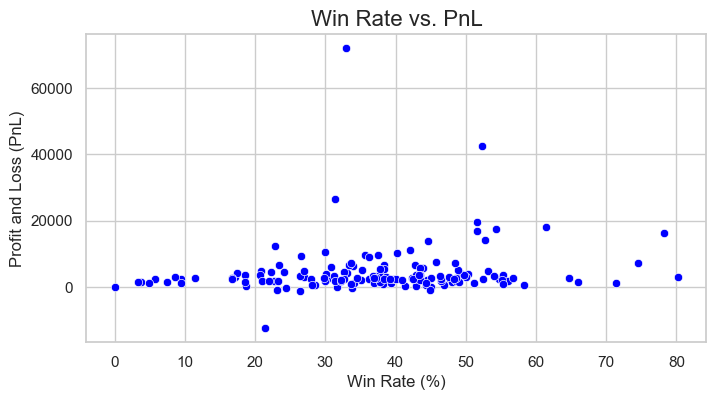

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'D:/#DataAnalyst/Primetrade.ai assignment/top_20_accounts.csv'
df = pd.read_csv(file_path)

# Scatter plot: Win Rate vs. PnL
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Win Rate (%)', y='PnL', data=df, color='blue')
plt.title('Win Rate vs. PnL', fontsize=16)
plt.xlabel('Win Rate (%)', fontsize=12)
plt.ylabel('Profit and Loss (PnL)', fontsize=12)
plt.show()


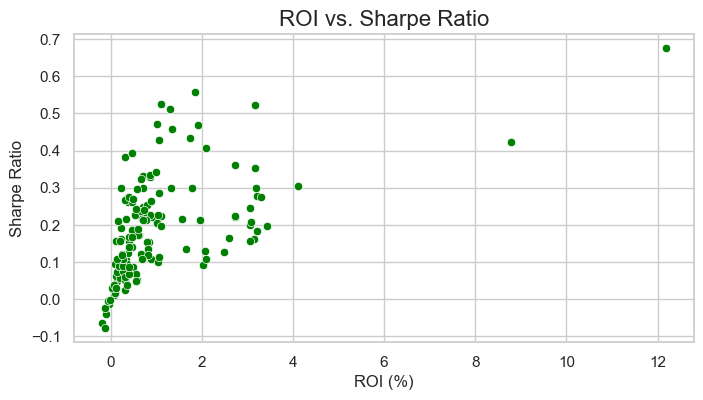

In [60]:
# Scatter plot: ROI vs. Sharpe Ratio
plt.figure(figsize=(8, 4))
sns.scatterplot(x='ROI (%)', y='Sharpe Ratio', data=df, color='green')
plt.title('ROI vs. Sharpe Ratio', fontsize=16)
plt.xlabel('ROI (%)', fontsize=12)
plt.ylabel('Sharpe Ratio', fontsize=12)
plt.show()


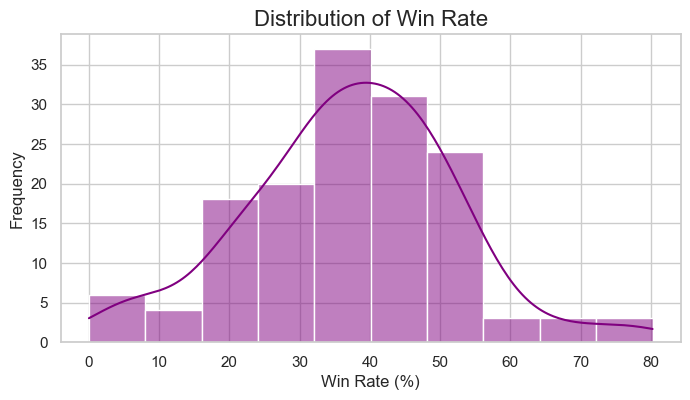

In [61]:
# Histogram: Distribution of Win Rate
plt.figure(figsize=(8, 4))
sns.histplot(df['Win Rate (%)'], bins=10, kde=True, color='purple')
plt.title('Distribution of Win Rate', fontsize=16)
plt.xlabel('Win Rate (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


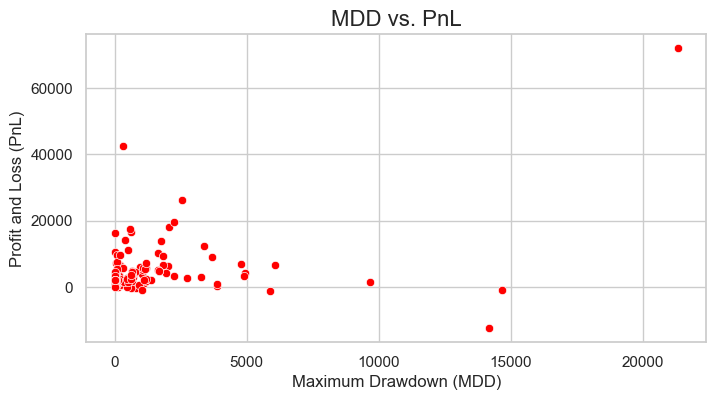

In [62]:
# Scatter plot: MDD vs. PnL
plt.figure(figsize=(8, 4))
sns.scatterplot(x='MDD', y='PnL', data=df, color='red')
plt.title('MDD vs. PnL', fontsize=16)
plt.xlabel('Maximum Drawdown (MDD)', fontsize=12)
plt.ylabel('Profit and Loss (PnL)', fontsize=12)
plt.show()


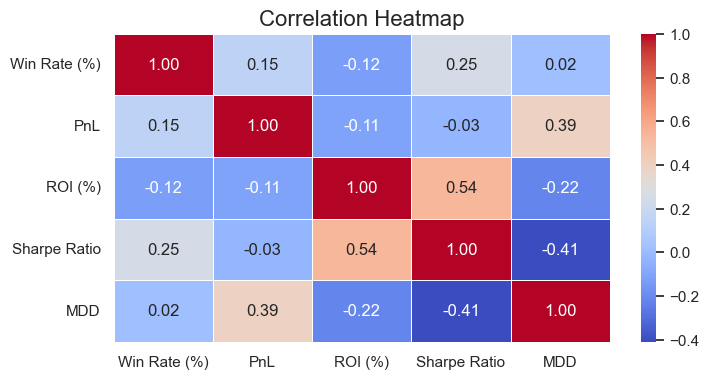

In [63]:
# Correlation heatmap
plt.figure(figsize=(8, 4))
correlation_matrix = df[['Win Rate (%)', 'PnL', 'ROI (%)', 'Sharpe Ratio', 'MDD']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


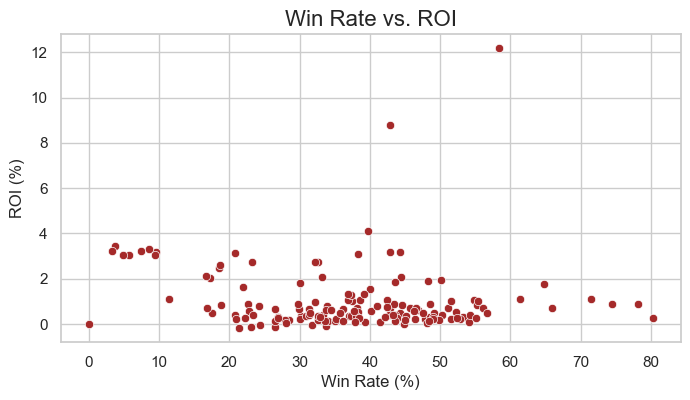

In [64]:
# Scatter plot: Win Rate vs. ROI
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Win Rate (%)', y='ROI (%)', data=df, color='brown')
plt.title('Win Rate vs. ROI', fontsize=16)
plt.xlabel('Win Rate (%)', fontsize=12)
plt.ylabel('ROI (%)', fontsize=12)
plt.show()


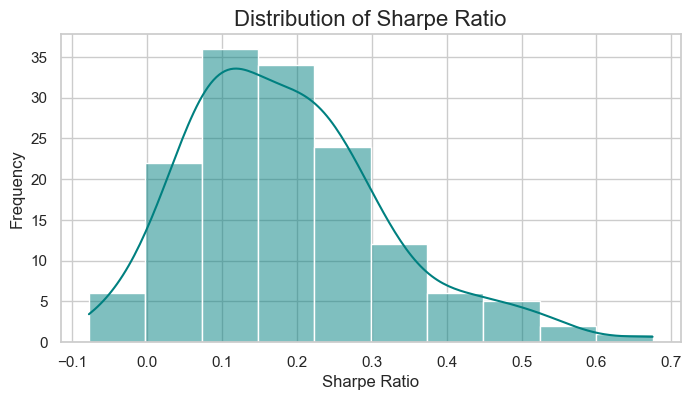

In [65]:
# Histogram: Distribution of Sharpe Ratio
plt.figure(figsize=(8, 4))
sns.histplot(df['Sharpe Ratio'], bins=10, kde=True, color='teal')
plt.title('Distribution of Sharpe Ratio', fontsize=16)
plt.xlabel('Sharpe Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


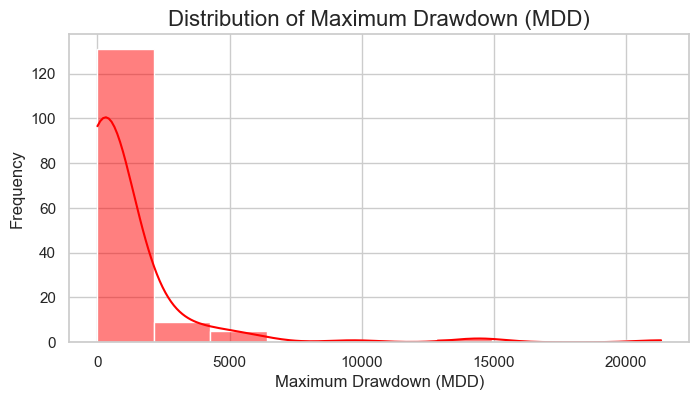

In [66]:
# Histogram: Distribution of MDD
plt.figure(figsize=(8,4))
sns.histplot(df['MDD'], bins=10, kde=True, color='red')
plt.title('Distribution of Maximum Drawdown (MDD)', fontsize=16)
plt.xlabel('Maximum Drawdown (MDD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
